In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/home/u213907/tmp/ipykernel_774084/191607474.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading Data

In [2]:
#pip install seaborn

In [3]:
#df_class=pd.read_csv("/content/survey_data.csv")
df_class=pd.read_csv("https://raw.githubusercontent.com/sijuswamy/Intel-Unnati-sessions/main/Feed_back_data.csv")

In [4]:
df_class.head()

,Timestamp,Name of the Participant,Email ID,Branch,Semester,Recourse Person of the session,How would you rate the overall quality and relevance of the course content presented in this session?,To what extent did you find the training methods and delivery style effective in helping you understand the concepts presented?,How would you rate the resource person's knowledge and expertise in the subject matter covered during this session?,To what extent do you believe the content covered in this session is relevant and applicable to real-world industry scenarios?,"How would you rate the overall organization of the session, including time management, clarity of instructions, and interactive elements?","Please provide any additional comments, suggestions, or feedback you have regarding the session. Your insights are valuable and will help us enhance the overall learning experience."
0,2024/02/19 1:41:40 PM GMT+5:30,Aaron James Koshy,aaron.csa2125@saintgits.org,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,NaN
1,2024/02/19 1:41:59 PM GMT+5:30,Rahul Biju,rb.csb2125@saintgits.org,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,4,NaN
2,2024/02/19 1:42:07 PM GMT+5:30,Sarang kj,sarangkj.ec2226@saintgits.org,ECE,Fourth,Dr. Anju Pratap,4,4,4,4,4,NaN
3,2024/02/19 1:42:14 PM GMT+5:30,Leya Kurian,leya.csb2125@saintgits.org,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,It was good session
4,2024/02/19 1:42:27 PM GMT+5:30,Muhamed Adil,maev.csb2125@saintgits.org,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,NaN


In [5]:
df_class.sample(5).style.set_properties(**{'background-color': 'darkgreen',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Timestamp,Name of the Participant,Email ID,Branch,Semester,Recourse Person of the session,How would you rate the overall quality and relevance of the course content presented in this session?,To what extent did you find the training methods and delivery style effective in helping you understand the concepts presented?,How would you rate the resource person's knowledge and expertise in the subject matter covered during this session?,To what extent do you believe the content covered in this session is relevant and applicable to real-world industry scenarios?,"How would you rate the overall organization of the session, including time management, clarity of instructions, and interactive elements?","Please provide any additional comments, suggestions, or feedback you have regarding the session. Your insights are valuable and will help us enhance the overall learning experience."
68,2024/02/20 1:03:30 PM GMT+5:30,Sidharth V Menon,svm.ec2125@saintgits.org,ECE,Sixth,Mrs. Akshara Sasidharan,4,4,4,4,4,nan
115,2024/02/21 8:26:49 PM GMT+5:30,Riya Sara Shibu,Riya.inmca2126@saintgits.org,IMCA,Sixth,Mrs. Gayathri J L,5,5,5,5,5,nan
10,2024/02/19 1:42:56 PM GMT+5:30,Rahul Krishnan,rahulk.ec2226@saintgits.org,ECE,Fourth,Dr. Anju Pratap,4,4,4,4,4,nan
60,2024/02/20 1:03:11 PM GMT+5:30,Abia Abraham,abia.ec2226@saintgits.org,ECE,Fourth,Mrs. Akshara Sasidharan,4,3,4,5,5,nan
88,2024/02/20 4:20:05 PM GMT+5:30,Shalin Ann Thomas,Shalinat.csb2226@saintgits.org,CSE,Fourth,Mrs. Akshara Sasidharan,3,3,3,3,3,nan


## Data wrangling

In [6]:

df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                                                                                              174 non-null    object
 1   Name of the Participant                                                                                                                                                                174 non-null    object
 2   Email ID                                      

In [7]:
df_class = df_class.drop(['Timestamp','Email ID','Please provide any additional comments, suggestions, or feedback you have regarding the session. Your insights are valuable and will help us enhance the overall learning experience.'],axis=1)

In [8]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                     --------------  ----- 
 0   Name of the Participant                                                                                                                    174 non-null    object
 1   Branch                                                                                                                                     174 non-null    object
 2   Semester                                                                                                                                   174 non-null    object
 3   Recourse Person of the session                          

In [9]:
df_class.columns = ["Name","Branch","Semester","Resourse Person","Content Quality","Effeciveness","Expertise","Relevance","Overall Organization"]

In [10]:
df_class.sample(5)

,Name,Branch,Semester,Resourse Person,Content Quality,Effeciveness,Expertise,Relevance,Overall Organization
65,Marianna Martin,CSE,Fourth,Mrs. Akshara Sasidharan,4,3,5,5,4
97,Sidharth V Menon,ECE,Sixth,Mrs. Veena A Kumar,4,4,4,4,4
140,Aiswarya Arun,CSE,Sixth,Mrs. Gayathri J L,5,5,5,5,5
51,Aaron Thomas Blessen,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5
159,Aaron James Koshy,CSE,Sixth,Mrs. Veena A Kumar,5,5,5,5,5


In [11]:
# checking for null
df_class.isnull().sum().sum()

0

In [12]:
# dimension

df_class.shape

(174, 9)

## Exploratory Data Analysis

In [13]:
## creating a percentage analysis of RP-wise distribution of data
round(df_class["Resourse Person"].value_counts(normalize=True)*100,2)

Resourse Person
Mrs. Akshara Sasidharan    34.48
Mrs. Veena A Kumar         31.03
Dr. Anju Pratap            17.24
Mrs. Gayathri J L          17.24
Name: proportion, dtype: float64

In [14]:
## creating a percentage analysis of RP-wise distribution of data
round(df_class["Name"].value_counts(normalize=True)*100,2)

Name
Sidharth V Menon             4.02
Rizia Sara Prabin            4.02
Aaron James Koshy            3.45
Rahul Krishnan               3.45
Allen John Manoj             3.45
Christo Joseph Sajan         3.45
Jobinjoy Ponnappal           3.45
Varsha S Panicker            3.45
Nandana A                    3.45
Anjana Vinod                 3.45
Rahul Biju                   3.45
Kevin Kizhakekuttu Thomas    3.45
Lara Marium Jacob            3.45
Abia Abraham                 3.45
Shalin Ann Thomas            3.45
Abna Ev                      3.45
Aaron Thomas Blessen         2.87
Sebin Sebastian              2.87
Sani Anna Varghese           2.87
Bhagya Sureshkumar           2.87
Jobin Tom                    2.87
Leya Kurian                  2.87
Jobin Pius                   2.30
Aiswarya Arun                2.30
Muhamed Adil                 2.30
Marianna Martin              2.30
Anaswara Biju                2.30
Mathews Reji                 1.72
MATHEWS REJI                 1.72
Riya Sara

## Visualization

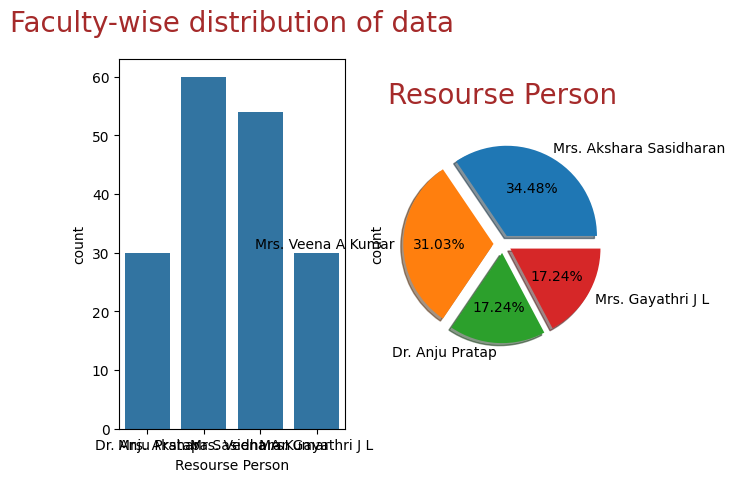

In [15]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Resourse Person', data=df_class)
#ax.bar_label(ax.containers[0])
plt.title("Faculty-wise distribution of data", fontsize=20,color = 'Brown',pad=20)
ax =plt.subplot(1,2,2)
ax=df_class['Resourse Person'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Resourse Person", fontsize = 20,color='Brown',pad=20);

## Summary of Responses


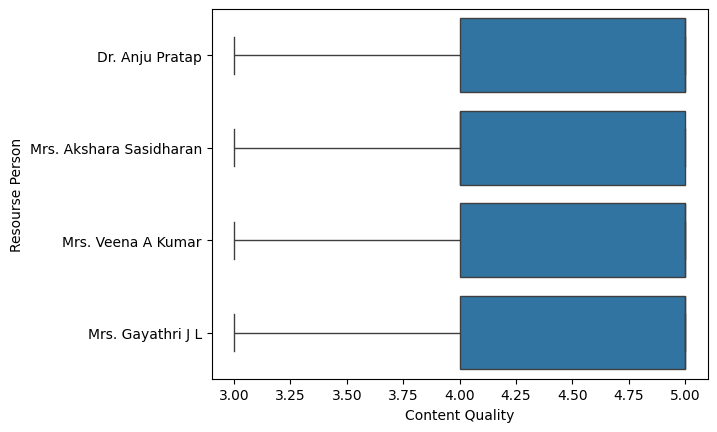

In [16]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Content Quality'])
plt.show()

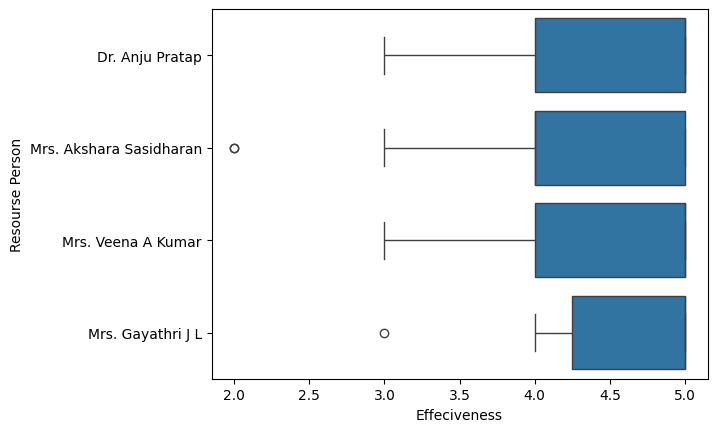

In [17]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Effeciveness'])
plt.show()

In [18]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  174 non-null    object
 1   Branch                174 non-null    object
 2   Semester              174 non-null    object
 3   Resourse Person       174 non-null    object
 4   Content Quality       174 non-null    int64 
 5   Effeciveness          174 non-null    int64 
 6   Expertise             174 non-null    int64 
 7   Relevance             174 non-null    int64 
 8   Overall Organization  174 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.4+ KB


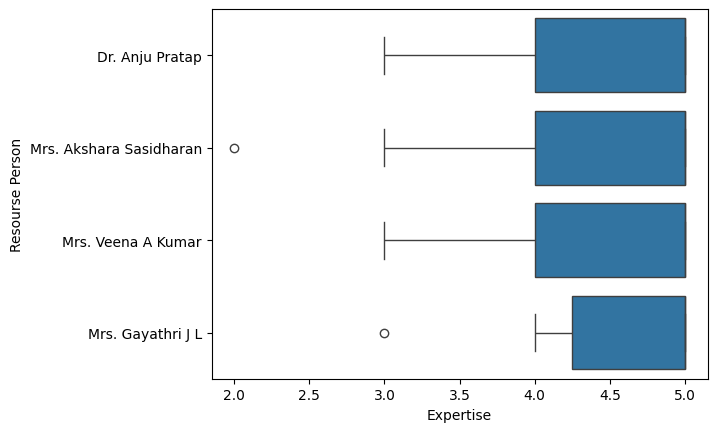

In [19]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Expertise'])
plt.show()

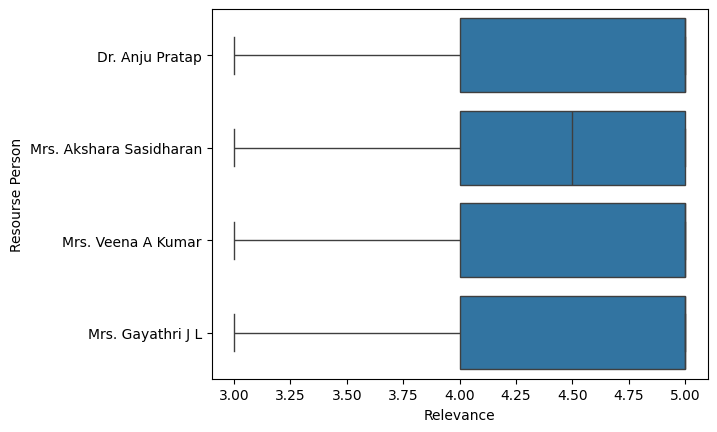

In [20]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Relevance'])
plt.show()

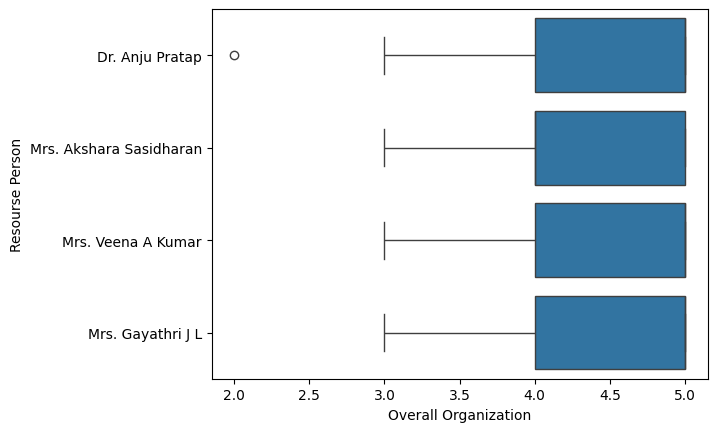

In [21]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Overall Organization'])
plt.show()

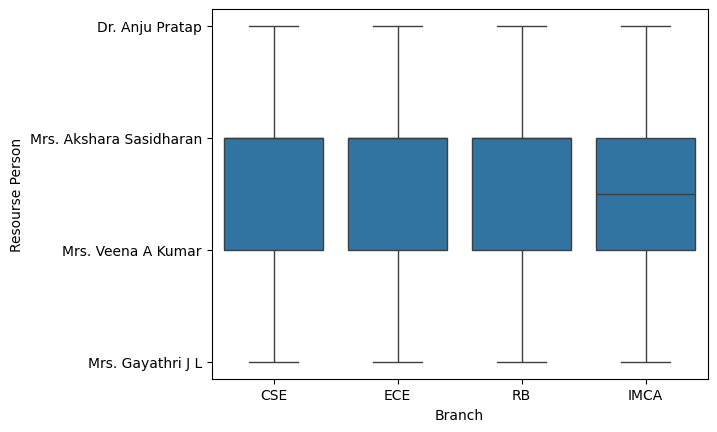

In [22]:
sns.boxplot(y=df_class['Resourse Person'],x=df_class['Branch'])
plt.show()

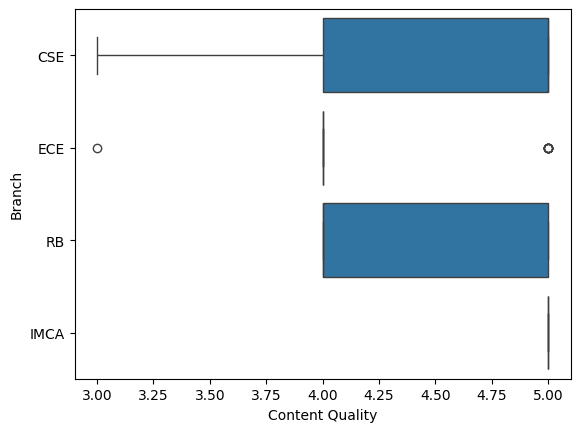

In [23]:
sns.boxplot(y=df_class['Branch'],x=df_class['Content Quality'])
plt.show()

# Using K-means Clustering to identify segmentation over student's satisfaction

## Finding the best value of k using elbow method

In [24]:
input_col=["Content Quality","Effeciveness","Expertise","Relevance","Overall Organization"]
X=df_class[input_col].values

In [25]:
# Initialize an empty list to store the within-cluster sum of squares
from sklearn.cluster import KMeans
wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# here inertia calculate sum of square distance in each cluster


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


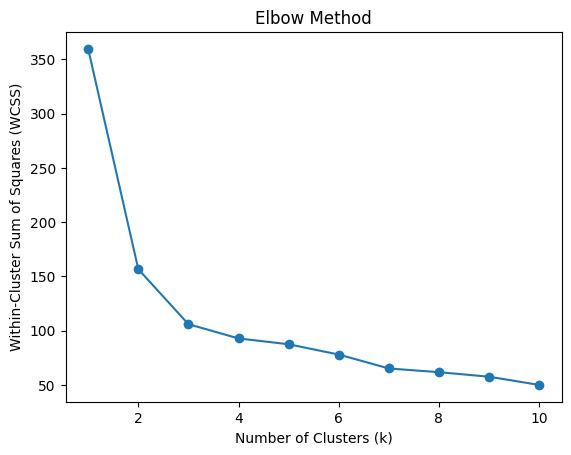

In [26]:
# Plot the within-cluster sum of squares for different values of k
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

## Using Gridsearch method

In [27]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create a KMeans object
kmeans = KMeans(n_init='auto',random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Perform grid search
grid_search.fit(X)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [28]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_clusters': 5}
Best Score: -17.904781085966768


## Implementing K-means clustering

In [29]:
# Perform k-means clustering
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

## Extracting labels and cluster centers

In [30]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
df_class['Cluster'] = labels


In [ ]:
df_class.head()

,Name,Branch,Semester,Resourse Person,Content Quality,Effeciveness,Expertise,Relevance,Overall Organization,Cluster
0,Aaron James Koshy,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,0
1,Rahul Biju,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,4,0
2,Sarang kj,ECE,Fourth,Dr. Anju Pratap,4,4,4,4,4,1
3,Leya Kurian,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,0
4,Muhamed Adil,CSE,Sixth,Dr. Anju Pratap,5,5,5,5,5,0


## Visualizing the clustering using first two features

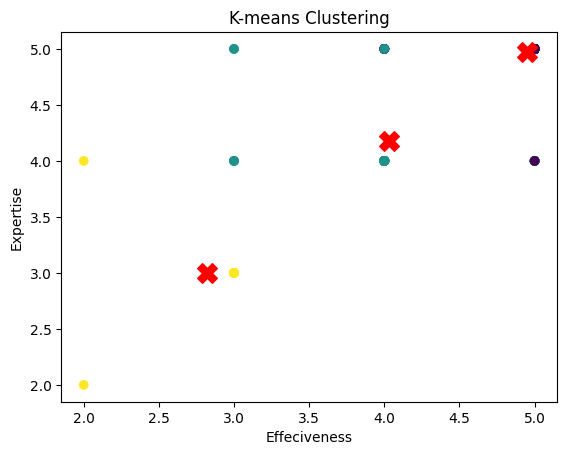

In [ ]:
# Visualize the clusters
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:, 2], marker='X', s=200, c='red')
plt.xlabel(input_col[1])
plt.ylabel(input_col[2])
plt.title('K-means Clustering')
plt.show()

## Perception on content quality over Clustors


>**Interpretation:** There is a statistically significant difference between the groups and their effects the libido, F= 21.64, p-value= 0.0, with an overall small effect, $\omega^2$ = 0.024.

In order to tell which groups differed significantly, post-hoc tests need to be conducted. Before one goes through that work, the assumptions should be checked first in case any modifications need to be made to the model.

In [ ]:
## normality of residuals
stats.shapiro(model.resid)

In [ ]:
## visualization

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

>**Conclusion**

Even though the ANOVA test subtstantiate the reasoning that the gender wise difference in the fruit rating score is statistically significant, the sufficiant conditions are not satisfied. So a non-parametric ANOVA is strongly recommended. But the $\chi^2$ test established the same result with  sufficiency condition checks.